## Objective

Here we have to classify English alphabets using multiclass classification with SVM. 

In [2]:
# Importing necessary packages and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset 
- It contains the 26 English alphabets as classes and each row in the data set represents an image of a handwritten alphabet.
- Using the pixelated images, 16 features are derived for each image, such as the width of the box, height,  the ratio of the mean variance of x divided by the width of the box, etc. 

In [3]:
# importing the dataset 
import os
dataset = pd.read_csv("../SVM/letter-recognition.csv")

In [4]:
dataset.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# checking for any null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
# Statistical analysis of dataset
dataset.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
print(dataset.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [8]:
# the column names have a space in their label ('xbox ', 'width', etc.) so, let's 'reindex' the column names
dataset.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
dataset.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [9]:
# checking if each letter is present in dataset
order = np.sort(dataset['letter'].unique())
order, len(order)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype=object),
 26)

In [10]:
## Checking if dataset is balanced or not
results = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
total = 0
for i in range(len(results)):
    print( f'{results[i]} : {round(dataset.letter.value_counts()[results[i]]/dataset.letter.value_counts().sum()*100, 2)}%')
    total += round(dataset.letter.value_counts()[results[i]]/dataset.letter.value_counts().sum()*100, 2)
print(f'Total = {round(total, 2)}%')

A : 3.94%
B : 3.83%
C : 3.68%
D : 4.03%
E : 3.84%
F : 3.88%
G : 3.86%
H : 3.67%
I : 3.78%
J : 3.74%
K : 3.7%
L : 3.8%
M : 3.96%
N : 3.91%
O : 3.76%
P : 4.01%
Q : 3.91%
R : 3.79%
S : 3.74%
T : 3.98%
U : 4.06%
V : 3.82%
W : 3.76%
X : 3.94%
Y : 3.93%
Z : 3.67%
Total = 99.99%


## Exploratory Data Analysis

<AxesSubplot:xlabel='letter', ylabel='width'>

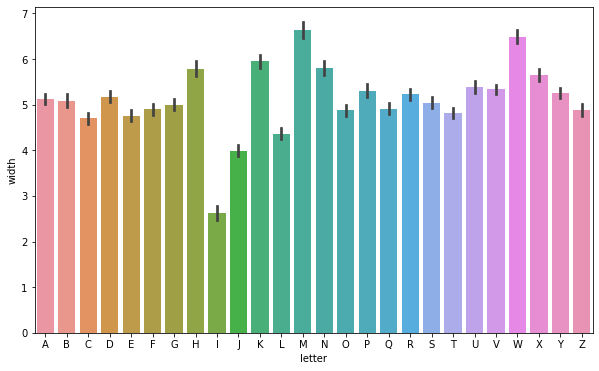

In [11]:
# Variation in width for each letter 

plt.figure(figsize=(10, 6))
sns.barplot(x='letter', y='width', data=dataset, order=order)

<AxesSubplot:xlabel='letter', ylabel='height'>

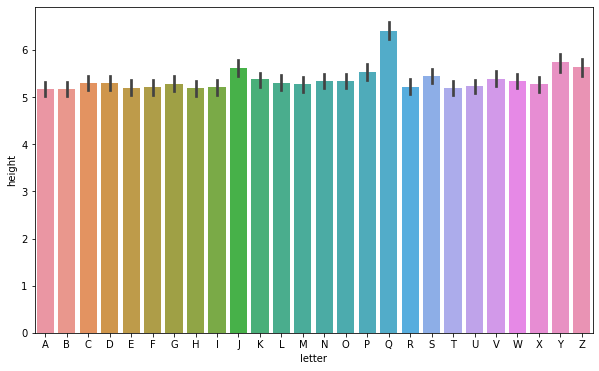

In [12]:
# Variation in height for each letter
plt.figure(figsize=(10, 6))
sns.barplot(x='letter', y='height', data=dataset, order=order)

In [13]:
# Lets calculate means of features of each letter

means = dataset.groupby('letter').mean()
means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


<AxesSubplot:ylabel='letter'>

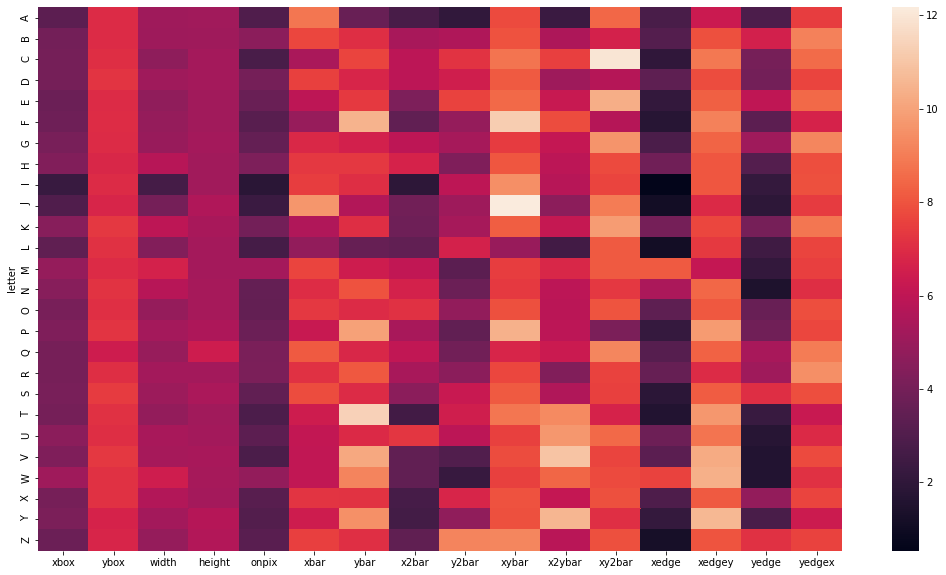

In [14]:
# Plotting heatmap of data for better intuition
plt.figure(figsize=(18, 10))
sns.heatmap(means)

## Feature scaling


In [15]:
# splitting dataset into features and labels
x = dataset.drop('letter', axis=1)
y = dataset['letter']

In [27]:
from sklearn.preprocessing import scale
x_scaled = scale(x)

## Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=43)

# Models

### Let's compare performance of both Linear and None-Linear SVM model .

## 1. Linear SVM  model

In [18]:
from sklearn.svm import SVC

linear_model = SVC(kernel='linear')
linear_model.fit(x_train, y_train)

SVC(kernel='linear')

### Prediction

In [19]:
y_predict = linear_model.predict(x_test)
y_predict

array(['H', 'Q', 'D', ..., 'K', 'U', 'O'], dtype=object)

### Evaluating the Model

In [20]:
from sklearn import metrics

In [21]:
accuracy = metrics.accuracy_score(y_pred = y_predict, y_true = y_test)
print(f'Accuracy : {round(accuracy * 100, 2)}%')

Accuracy : 85.28%


In [29]:
report = metrics.classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           A       0.88      0.96      0.92       182
           B       0.82      0.83      0.82       187
           C       0.86      0.88      0.87       177
           D       0.76      0.89      0.82       207
           E       0.82      0.83      0.83       195
           F       0.82      0.88      0.85       196
           G       0.71      0.76      0.74       193
           H       0.64      0.70      0.67       169
           I       0.92      0.89      0.90       192
           J       0.86      0.88      0.87       178
           K       0.76      0.80      0.78       179
           L       0.88      0.90      0.89       188
           M       0.90      0.94      0.92       199
           N       0.94      0.90      0.92       197
           O       0.89      0.72      0.80       187
           P       0.95      0.84      0.89       208
           Q       0.89      0.78      0.83       204
           R       0.75    

#### The linear model gives approx. 85% accuracy.

## 2.Non-Linear SVM model

here we will use 'rbf' kernel for non-linear classification, and we will use default values of C=1 and default value of gamma

### training the model

In [30]:
# fitting the model

nonlinear_model = SVC(kernel='rbf')

nonlinear_model.fit(x_train, y_train)

SVC()

In [31]:
# Prediction

y_predicted = nonlinear_model.predict(x_test)
y_predicted

array(['H', 'Q', 'N', ..., 'K', 'U', 'D'], dtype=object)

### Evaluating the Model

In [32]:
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predicted)
print(f'Accuracy : {round(accuracy * 100, 2)}%')

Accuracy : 94.62%


In [33]:
report = metrics.classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           A       0.98      0.99      0.98       182
           B       0.84      0.95      0.89       187
           C       0.96      0.93      0.95       177
           D       0.87      0.98      0.92       207
           E       0.91      0.95      0.93       195
           F       0.93      0.96      0.94       196
           G       0.90      0.95      0.92       193
           H       0.91      0.86      0.88       169
           I       0.97      0.92      0.94       192
           J       0.94      0.93      0.94       178
           K       0.95      0.89      0.92       179
           L       0.99      0.94      0.97       188
           M       0.97      0.98      0.98       199
           N       0.97      0.92      0.95       197
           O       0.93      0.94      0.94       187
           P       0.99      0.89      0.94       208
           Q       0.96      0.96      0.96       204
           R       0.82    

The accuracy achieved using a non-linear kernel is approximately 95% which is  much higher than that of a linear one 85%. 

#### We can conclude that the problem is highly non-linear in nature.